Directories exist; saving data


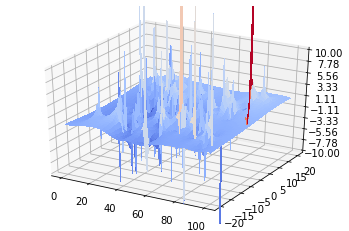

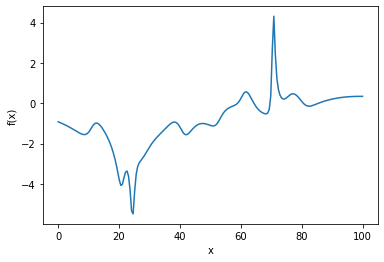

In [2]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from rmm import rmm_utils
from rmm import rmm_plot


# Generate toy model data

importlib.reload(rmm_utils)
importlib.reload(rmm_plot)

# Parameters
path = 'training_data/test'
number_of_poles = 50
true_poles = rmm_utils.random_poles(number_of_poles, [[10, 90], [-15,15]])
#true_residues = 4*np.random.rand(n)
true_residues = 3*np.array([ np.exp(1j*2*np.pi*np.random.rand(1)) for i in range(number_of_poles)])
X = np.linspace(0,100,200)
Y = np.linspace(-20, 20, 50)


# Run
rmm_utils.generate_true_data('training_data/test1', X, Y, true_poles, true_residues)